In [292]:
# CS-E5795 - Computational Methods in Stochastics
# Assignment 1

In [293]:
# GGL random number generator
# x0: seed
# l: number of values to be generated 
def ggl(x0,l):
    c = 0
    m = (2 ** 31 - 1)
    ggl_integers = []
    
    while c < l:
        if c == 0:
            x1 = (16807*x0) % m
        else:
            x1 = (16807*ggl_integers[c-1]) % m
        ggl_integers.append(x1)
        c += 1
    
    return ggl_integers

In [294]:
# RAN3 generator, initial 55 elements (seeds) are generated by function ggl
# l: number of values to be generated
# s: seed for the ggl

def ran3(s,l):
    #generate the initial 55 numbers with ggl
    ran3_integers = ggl(s,55)
    c = 55
    m = (2 ** 32)
    
    while c < l:
        x1 = (ran3_integers[c-55] - ran3_integers[c-24]) % m
        ran3_integers.append(x1)
        c += 1
    return ran3_integers

In [295]:
# Helper functions
# function to scale values with m
def scale(values, m):
    scaled_values = []
    for x in values:
        y = x / m
        scaled_values.append(y)
    return scaled_values

# function to calculate the mean of the values given as a parameter
def mean(values):
    mean = 0
    for x in values:
        mean += x/len(values)
    return mean

# function to calculate the variance of the values given as a parameter
def variance(values):
    mean2 = 0
    for x in values:
        mean2 += x**2/len(values)
    variance = mean2 - mean(values)**2
    return variance

In [296]:
# Tests for the mean and the variance, generating the numbers to simulate the 𝑋 ~ 𝑈(0,1) and 𝑌 ~ 𝑈(0,1).

ggl_values_x = ggl(31,1000000)
ggl_values_y = ggl(37,1000000)
ggl_values_x_scaled = scale(ggl_values_x,2**31-1)
ggl_values_y_scaled = scale(ggl_values_y,2**31-1)
print('GGL')
print('mean: ',mean(ggl_values_x_scaled))
print('variance: ',variance(ggl_values_x_scaled))

ran_values_x = ran3(4,1000000)
ran_values_y = ran3(5,1000000)
ran_values_x_scaled = scale(ran_values_x,2**32)
ran_values_y_scaled = scale(ran_values_y,2**32)
print('RAN3')
print('mean: ',mean(ran_values_x_scaled))
print('variance: ',variance(ran_values_x_scaled))

GGL, x values
mean:  0.5004288541206795
variance:  0.08341540590053542
RAN3, x values
mean:  0.5002298905997216
variance:  0.08340655866329982


In [297]:
# Simulate 𝑋 ~ 𝑈(0,1) and 𝑌 ~ 𝑈(0,1) using your GGL, your RAN3 and the built-in random 
# number generator in Python (Mersenne-Twister).

# The GGL- and RAN3 numbers have already been generated. Numbers generated 
# with the built-in generator in Python.

from random import random
l = 1000000
c = 0
random_numbers_x = []
random_numbers_y = []
while c < l:
    random_numbers_x.append(random())
    random_numbers_y.append(random())
    c += 1
    
print('Mersenne-Twister, x values')
print('mean: ',mean(random_numbers_x))
print('variance: ',variance(random_numbers_x))

Mersenne-Twister, x values
mean:  0.4998758232884551
variance:  0.08344662223386415


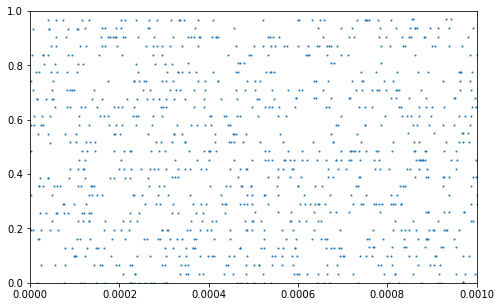

In [298]:
# Plot the generated values of GGL
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(ggl_values_x_scaled, ggl_values_y_scaled,s=1)
plt.axis([0.000,0.001,0,1])
plt.show()

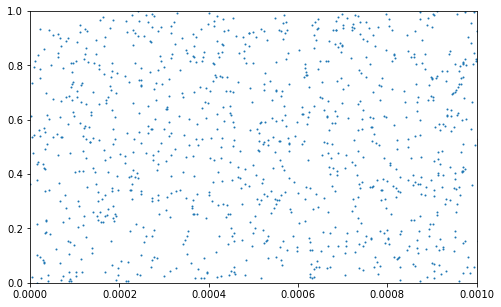

In [299]:
# Plot the generated values of RAN3
plt.figure(figsize=(8, 5))
plt.scatter(ran_values_x_scaled,ran_values_y_scaled, s=1)
plt.axis([0.000,0.001,0,1])
plt.show()

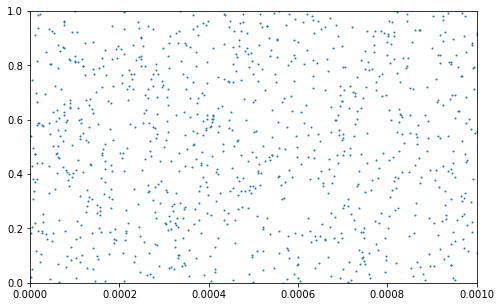

In [300]:
# Plot the generated values of Mersenne-Twister
plt.figure(figsize=(8, 5))
plt.scatter(random_numbers_x,random_numbers_y,s=1)
plt.axis([0,0.001,0,1])
plt.show()

In [301]:
# Visual tests: results
# According to the lecture slides, the GGL has a problem with
# correlations, but RAN3 does not.
#
# The problem with the correlations is clearly visible on the figure with 
# plotted GGL values. The plotted values of RAN3 are already more uniformly distributed.
# In a similar way, the values of the built-in number generator in python seem to be 
# uniformly distributed.